In [43]:
import pandas as pd
import numpy as np

This notebook roughly investigates if Factor Analysis can correctly find genes in the k = 1 pathway that **DICER1** participates in.

# Preparing the data for analysis

Loading main gene dependency data:

In [44]:
df_gene_effect = pd.read_csv("preprocessed_data/20Q4v2_Achilles_gene_effect.csv")

df_gene_effect.head()

,DepMap_ID,A1BG (1),A1CF (29974),A2M (2),A2ML1 (144568),A3GALT2 (127550),A4GALT (53947),A4GNT (51146),AAAS (8086),AACS (65985),...,ZWILCH (55055),ZWINT (11130),ZXDA (7789),ZXDB (158586),ZXDC (79364),ZYG11A (440590),ZYG11B (79699),ZYX (7791),ZZEF1 (23140),ZZZ3 (26009)
0,ACH-000004,0.181332,0.089101,-0.193867,-0.024587,0.038458,-0.181824,0.351672,-0.440073,0.292582,...,-0.124218,-0.469306,NaN,NaN,0.257361,0.244834,-0.408512,0.284734,0.226412,-0.149566
1,ACH-000005,-0.076383,0.245190,0.191238,0.153008,-0.197035,-0.323295,0.252522,-0.571498,-0.068945,...,-0.212442,-0.426151,-0.068295,0.031635,0.205469,-0.068536,-0.092858,0.074640,0.028779,-0.264840
2,ACH-000007,0.102195,0.092449,-0.045926,0.171892,0.140561,0.170971,0.086060,-0.432320,0.010664,...,-0.083183,-0.269196,0.101146,0.277820,0.208814,0.001393,-0.327514,0.048714,-0.372854,-0.433157
3,ACH-000009,0.142342,-0.033126,-0.051224,0.060560,0.116002,-0.010044,0.104725,-0.610481,0.181508,...,-0.277264,-0.307018,0.044741,0.201551,0.083866,0.052208,-0.574719,0.218682,-0.074750,-0.551760
4,ACH-000011,0.280082,0.088898,0.032321,0.446598,-0.037188,-0.228207,0.110942,-0.406541,0.153979,...,-0.385241,-0.476314,-0.000984,0.013225,0.294002,0.137939,-0.245951,0.111173,-0.227417,-0.349564


DICER1 correlation data:

In [45]:
df_correlations = pd.read_csv("preprocessed_data/corr_DICER1_preprocessed.csv", delimiter=";")

df_correlations[:10]

,gene_selected,gene_evaluated,corr,pvalue,rank,is_on_pathway
0,DICER1,DICER1,1,Inf,1,1
1,DICER1,XPO5,"0,503616844","52,45448018",2,1
2,DICER1,DROSHA,"0,33792351","22,30645548",3,1
3,DICER1,AGO2,"0,329596473","21,20102211",4,1
4,DICER1,ANKRD52,"0,298301131","17,34229262",5,1
5,DICER1,DGCR8,"0,281137304","15,41695831",6,1
6,DICER1,DOLK,"0,243667755","11,65924734",7,0
7,DICER1,MNAT1,"0,210099516","8,665429172",8,0
8,DICER1,MAP4K4,"-0,208073683","8,627124342",9,0
9,DICER1,RBSN,"0,207383078","8,573272881",10,0


In [46]:
# TODO: Consider making gene selection even easier?

number_of_genes = 6 # Should be an even number
assert(number_of_genes % 2 == 0)
selected_columns = pd.concat([df_correlations["gene_evaluated"][:number_of_genes]]).to_list()
selected_columns = tuple(selected_columns)
selected_columns, len(selected_columns)

(('DICER1', 'XPO5', 'DROSHA', 'AGO2', 'ANKRD52', 'DGCR8'), 6)

In [47]:
columns_of_interest = [column for column in df_gene_effect.columns if column.split(" ")[0] in selected_columns]
assert(len(selected_columns) == len(columns_of_interest)) # Rough automatic check for whether we found all corresponding columns in gene_effect dataset that we've selected.
columns_of_interest, len(columns_of_interest)

(['AGO2 (27161)',
  'ANKRD52 (283373)',
  'DGCR8 (54487)',
  'DICER1 (23405)',
  'DROSHA (29102)',
  'XPO5 (57510)'],
 6)

In [48]:
X = df_gene_effect[columns_of_interest].dropna() # Is dropping rows with na a good idea? Maybe use mean value instead?
X = X.to_numpy()
if 808 - X.shape[0] > 0:
    print(f"Warning: {808 - X.shape[0]} rows contained at least 1 NA and was dropped.")
X

array([[-0.4857908 ,  0.06175832, -0.41222107, -0.8004828 , -0.4713539 ,
        -0.97641143],
       [-0.21164774,  0.14498796, -0.71179109, -1.34280182, -0.77950186,
        -0.85951948],
       [-0.04729373, -0.03561509, -0.40902307, -0.99339407, -0.26187203,
        -0.9101072 ],
       ...,
       [-0.30355749, -0.22604831, -0.51296587, -0.77728635, -0.83547863,
        -0.98032875],
       [-0.2080956 , -0.44025286, -0.33686943, -1.03086781, -0.88377852,
        -0.68658601],
       [-0.23558176, -0.41966249, -0.4008335 , -1.12005704, -0.800313  ,
        -1.09288046]])

C:\Users\Alexc\AppData\Local\Temp\ipykernel_23336\2197811955.py:18: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


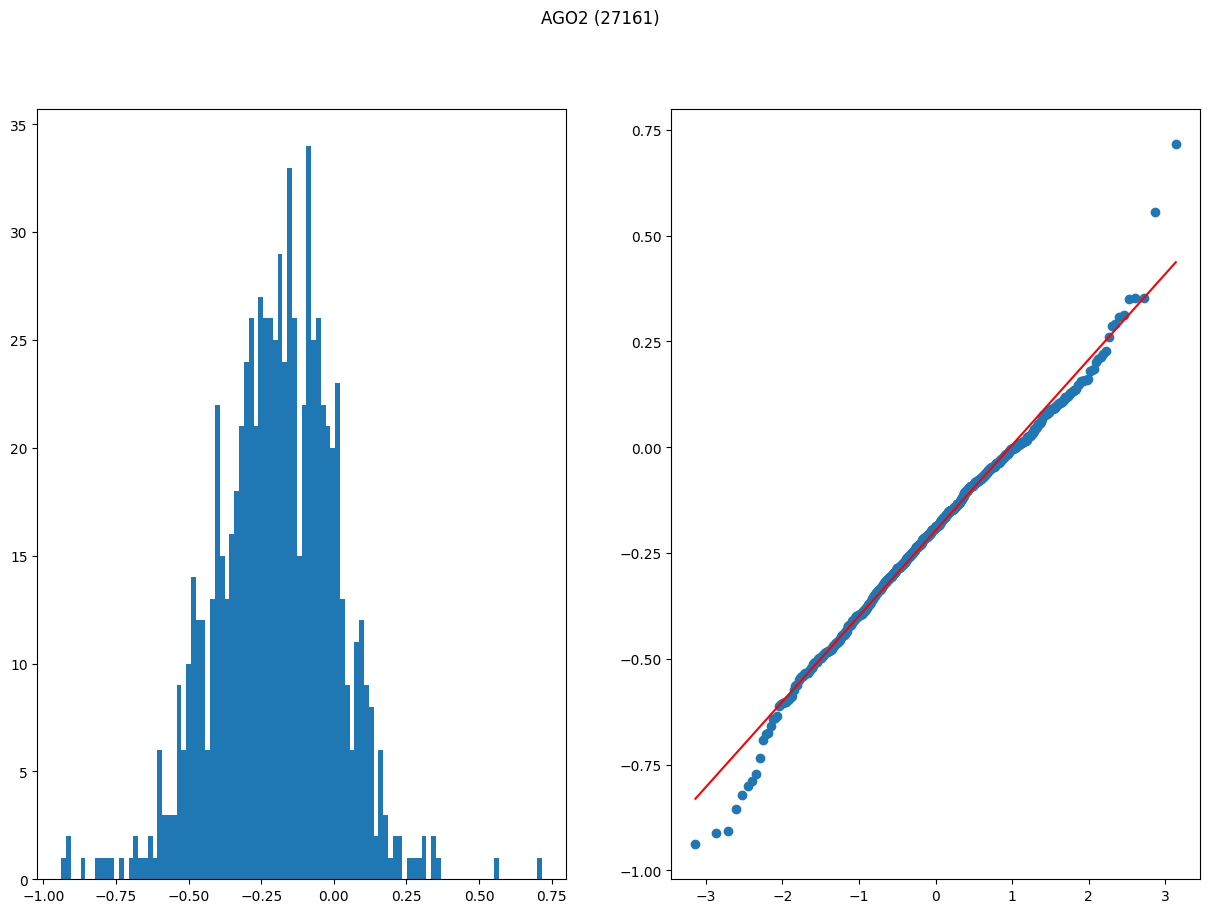

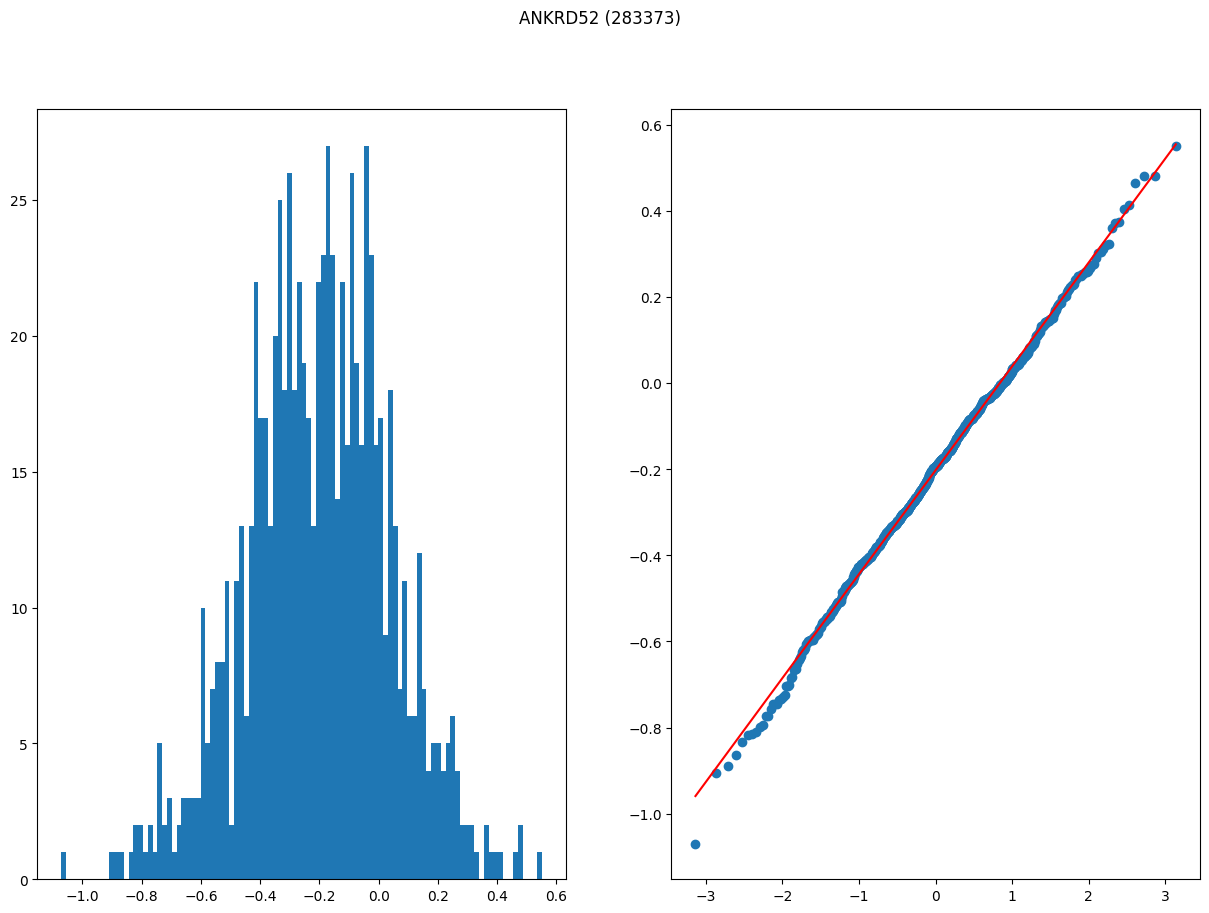

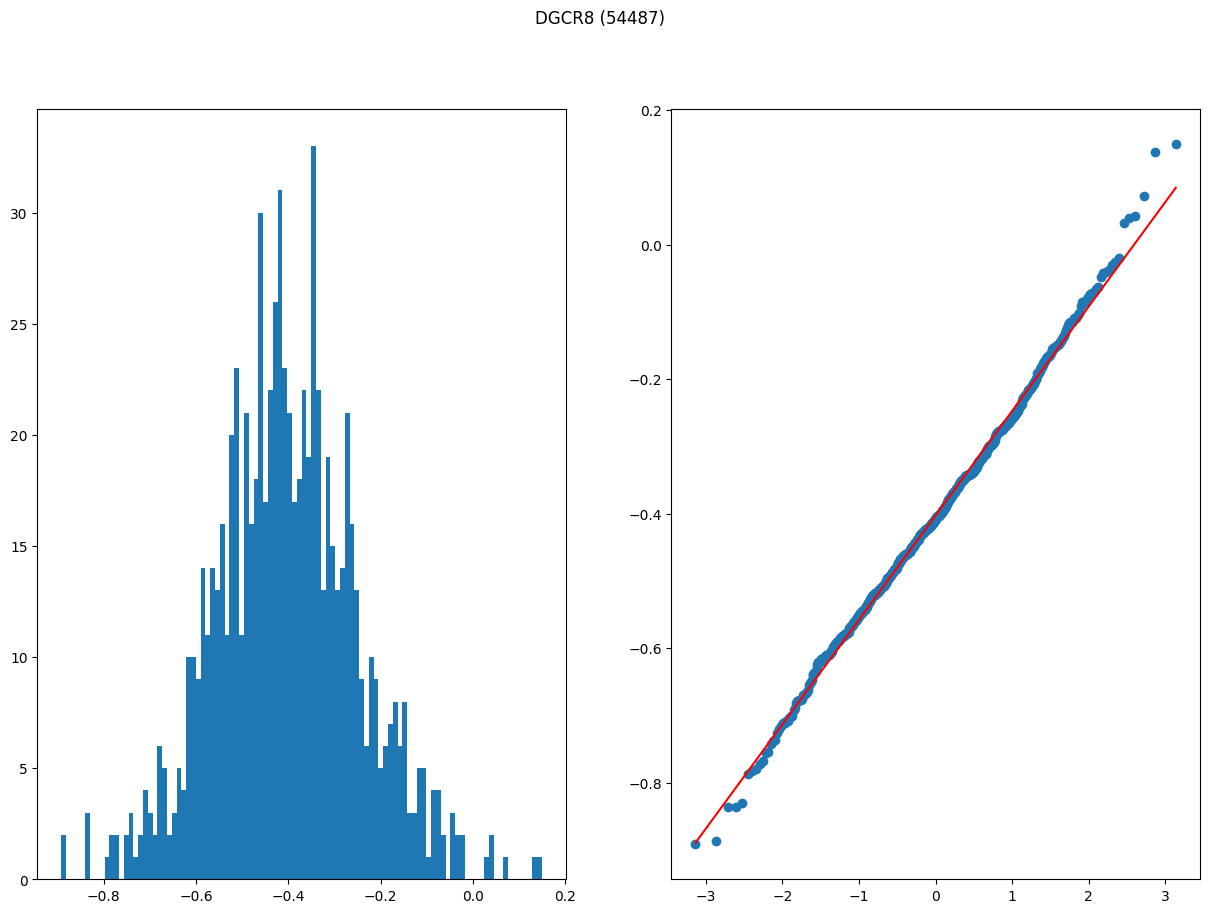

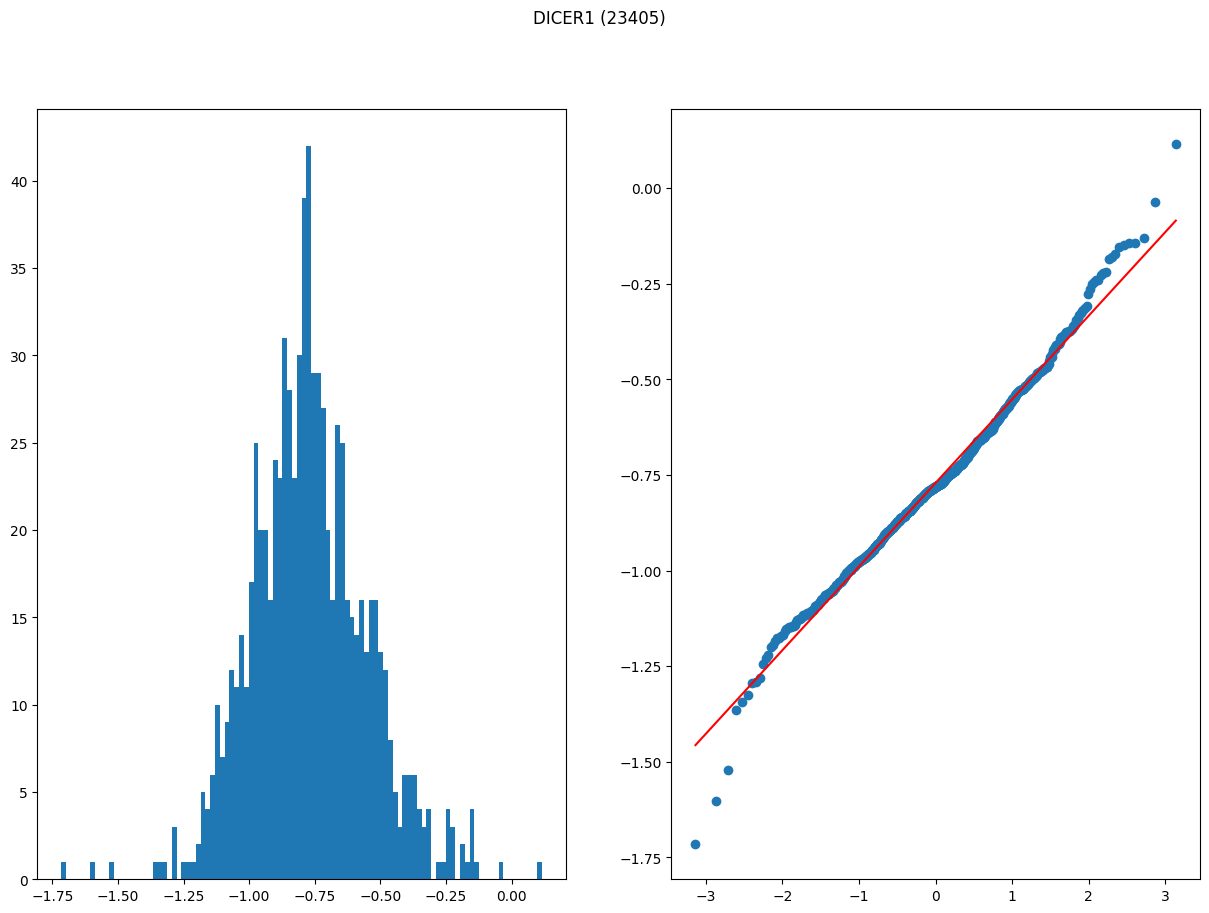

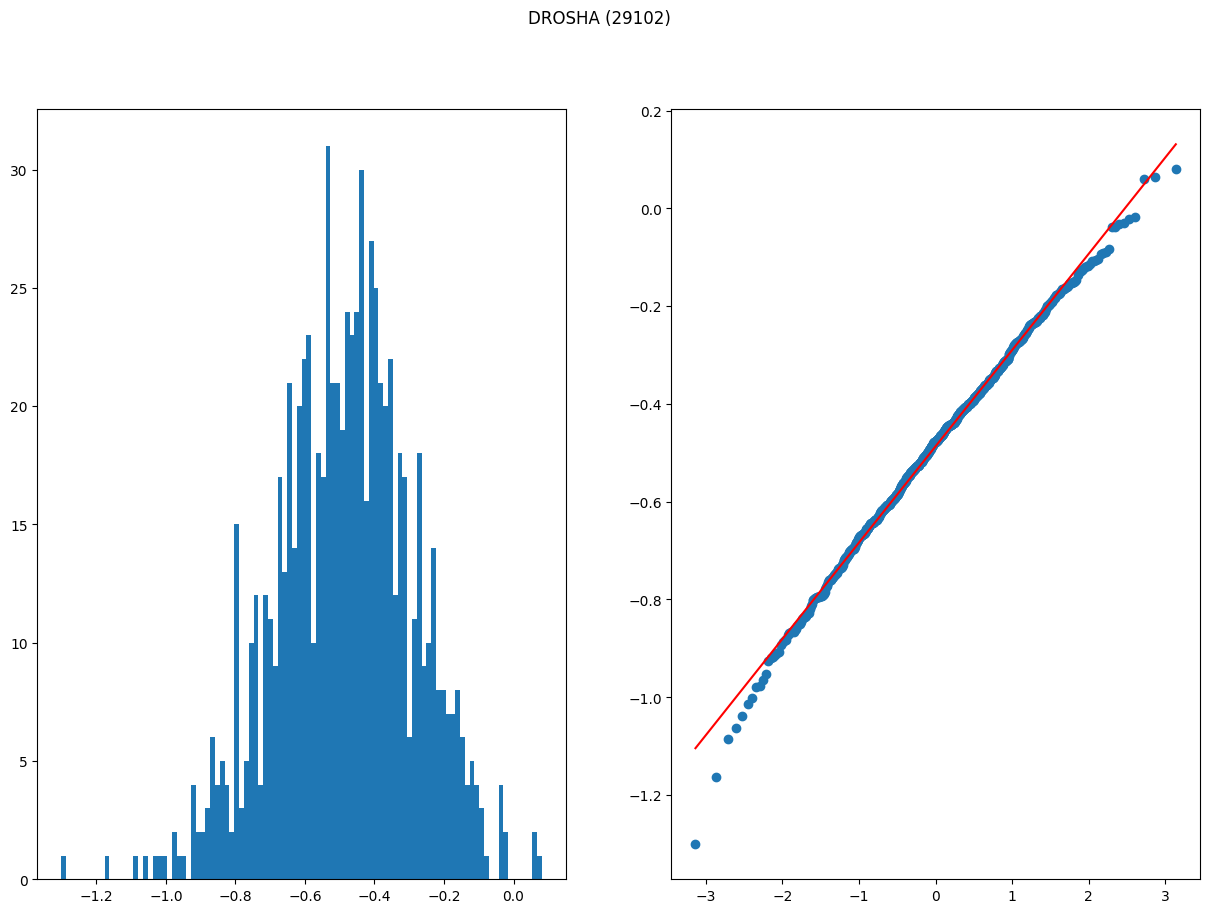

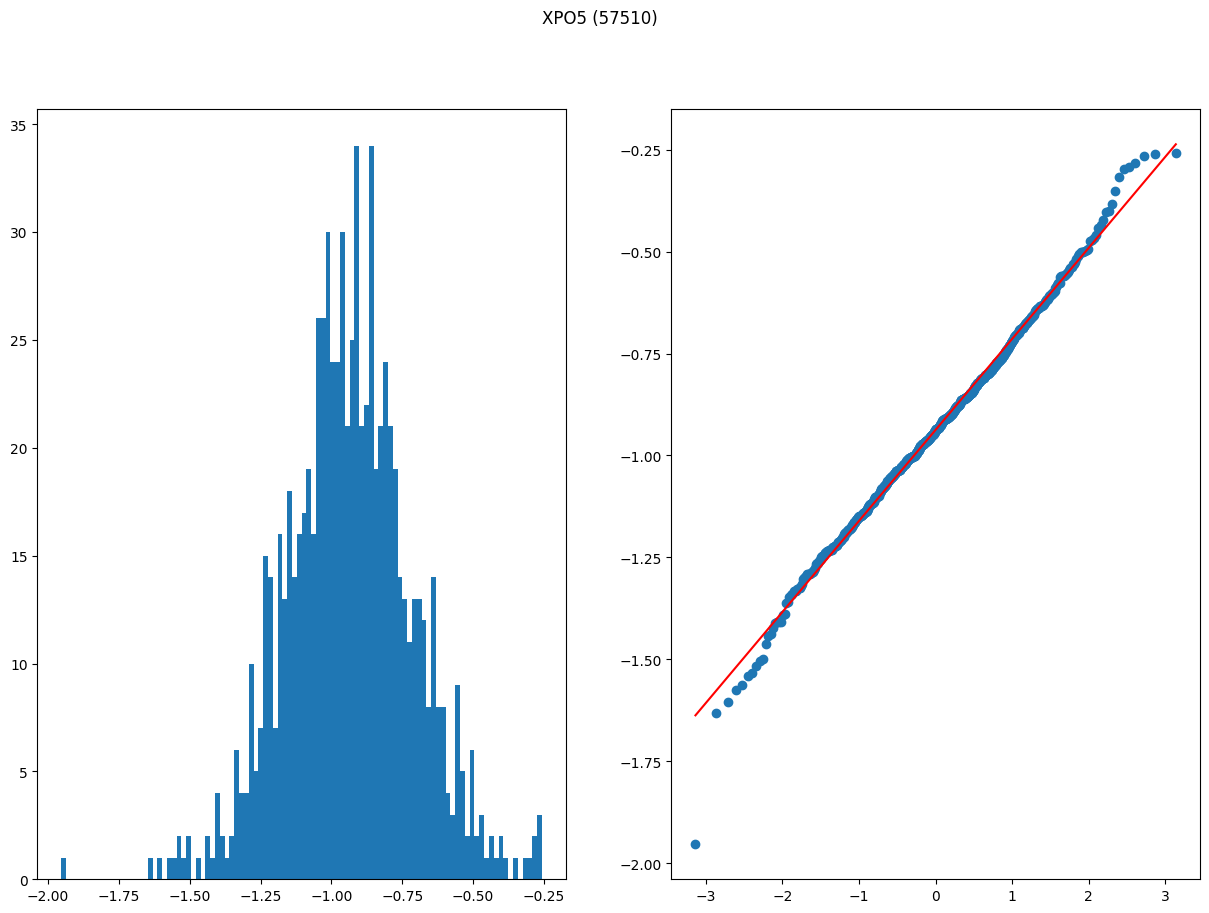

In [49]:
import matplotlib.pyplot as plt

import scipy.stats as stats

for i in range(X.shape[1]):
    fig, ax = plt.subplots(1, 2, figsize=(18, 10))
    fig.set_size_inches(15,10)
    fig.suptitle(columns_of_interest[i])

    qq = stats.probplot(X[:, i], dist="norm")


    ax[0].hist(X[:, i], bins=100)

    ax[1].scatter(qq[0][0], qq[0][1])
    ax[1].plot(qq[0][0], qq[1][0]*qq[0][0] + qq[1][1], c="r")

    fig.show()

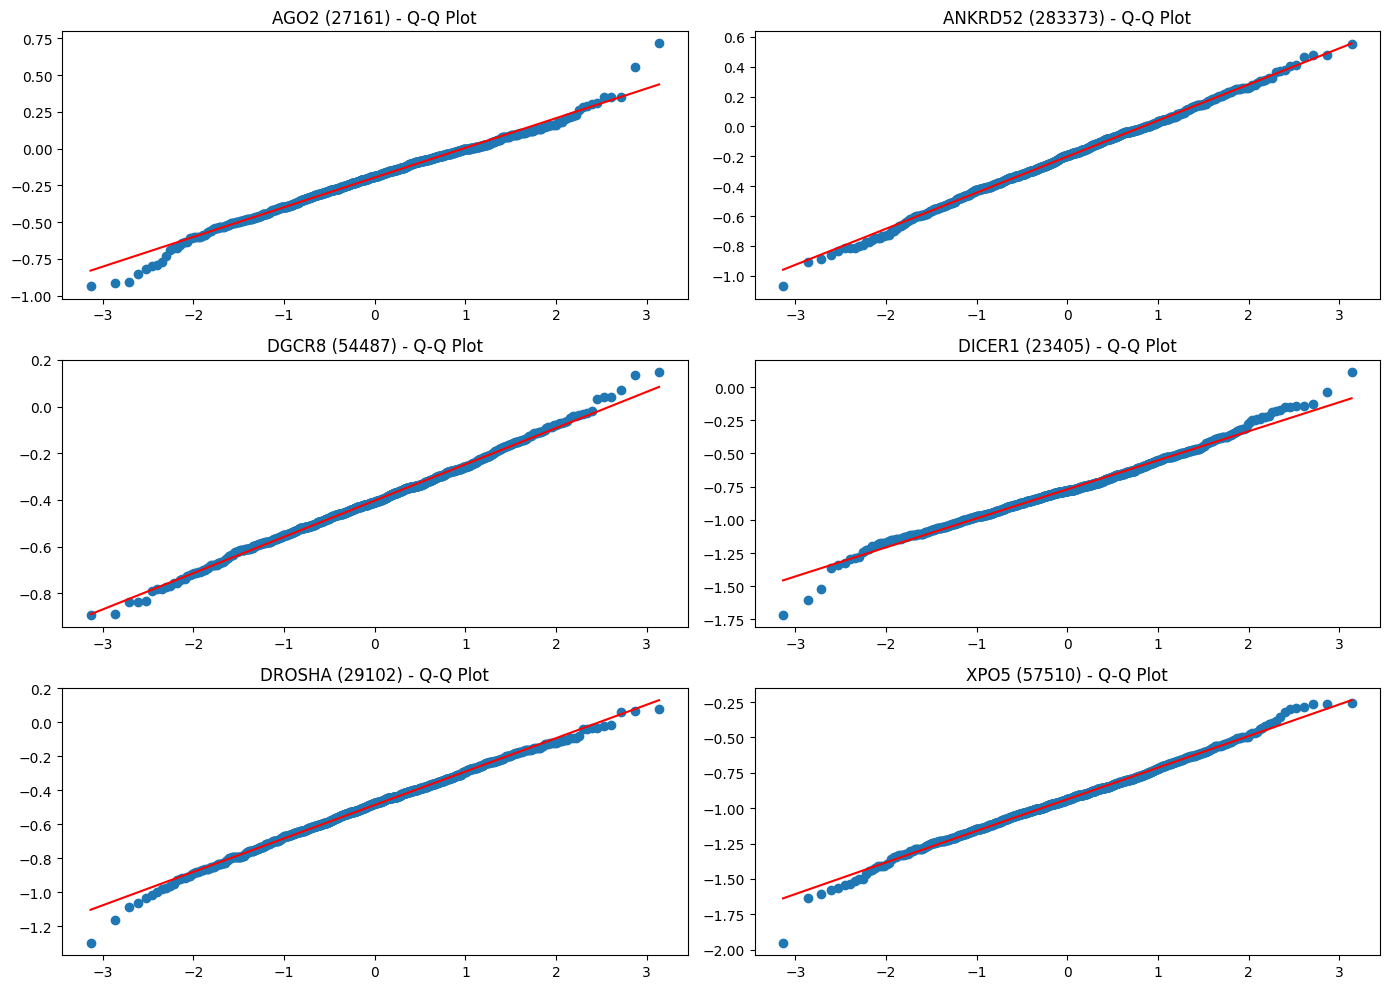

In [50]:
import matplotlib.pyplot as plt
import scipy.stats as stats

num_plots = X.shape[1]
columns = columns_of_interest

# Set up a 2x3 grid of subplots
fig, axes = plt.subplots(3, 2, figsize=(14, 10))
axes = axes.flatten()  # Flatten to make indexing easier

for i in range(min(num_plots, 6)):  # Limit to 6 plots to fit the 2x3 grid
    qq = stats.probplot(X[:, i], dist="norm")
    axes[i].scatter(qq[0][0], qq[0][1])
    axes[i].plot(qq[0][0], qq[1][0]*qq[0][0] + qq[1][1], c="r")
    axes[i].set_title(f'{columns[i]} - Q-Q Plot')

# Hide any unused subplots (if less than 6 plots)
for j in range(num_plots, 6):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


In [51]:
# [np.hstack(X, np.random.random(size = X.shape[0]) for _ in range(5)]
 
num_random_cols = 6

X_with_random_noise = np.hstack([X] + [np.random.random(size=X.shape[0]).reshape(-1, 1) for _ in range(num_random_cols)])

X_with_random_noise.shape




(808, 12)

In [52]:
np.random.random(size = 10).reshape(-1, 1)

array([[0.53340013],
       [0.48408786],
       [0.33976844],
       [0.12372979],
       [0.57457504],
       [0.53301039],
       [0.03261005],
       [0.38510469],
       [0.14152702],
       [0.38464323]])

# Analysis

In [53]:
import sys
import os

# Get the current working directory (where the notebook is running)
notebook_dir = os.getcwd()

# Go up one level to the parent directory
parent_dir = os.path.abspath(os.path.join(notebook_dir, '..'))

# Add parent directory to sys.path
if parent_dir not in sys.path:
    sys.path.insert(0, parent_dir)

# Now you can import your module
from utils import factor_model_solution, factor_goodness_of_fit_test

In [54]:
_, lambda_hat = factor_model_solution(X_with_random_noise, k = 1)
lambda_hat

array([[ 0.48851758],
       [ 0.49012865],
       [ 0.34199974],
       [ 0.71604367],
       [ 0.4397172 ],
       [ 0.6712208 ],
       [ 0.02290031],
       [-0.06378811],
       [ 0.05916821],
       [-0.1238961 ],
       [-0.02687535],
       [ 0.04485855]])

In [55]:
loadings = lambda_hat.T[0] # Extract loadings as a list

print(loadings)

# Extract gene names (everything before the space)
genes = [column.split(" ")[0] for column in columns_of_interest]

genes = genes + [str(i) + " random column" for i in range(num_random_cols)]

# Create a DataFrame from genes and values
df_values = pd.DataFrame({
    'gene_evaluated': genes,
    'loadings': loadings
})

# Merge with df_correlations on 'gene'
merged_df = df_values.merge(df_correlations[['gene_evaluated', 'is_on_pathway']], on='gene_evaluated', how='left')

print(merged_df.sort_values("loadings", ascending=False))


[ 0.48851758  0.49012865  0.34199974  0.71604367  0.4397172   0.6712208
  0.02290031 -0.06378811  0.05916821 -0.1238961  -0.02687535  0.04485855]
     gene_evaluated  loadings  is_on_pathway
3            DICER1  0.716044            1.0
5              XPO5  0.671221            1.0
1           ANKRD52  0.490129            1.0
0              AGO2  0.488518            1.0
4            DROSHA  0.439717            1.0
2             DGCR8  0.342000            1.0
8   2 random column  0.059168            NaN
11  5 random column  0.044859            NaN
6   0 random column  0.022900            NaN
10  4 random column -0.026875            NaN
7   1 random column -0.063788            NaN
9   3 random column -0.123896            NaN


We get heavier loadings on genes that actually lie on the pathway!!

In [56]:
factor_goodness_of_fit_test(X, k = 1)

2.206298456791358e-09

Test shows that k = 1 **is not** sufficient to describe (**all**) the data. But sufficient to **only** capture the (single) pathway perhaps?

In [57]:
merged_df['is_on_pathway'] = [1 if is_on == 1 else 0 for is_on in merged_df['is_on_pathway'] ]
merged_df['is_on_pathway']

0     1
1     1
2     1
3     1
4     1
5     1
6     0
7     0
8     0
9     0
10    0
11    0
Name: is_on_pathway, dtype: int64

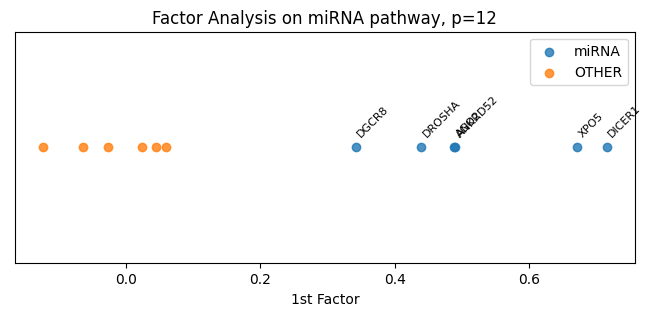

In [59]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,3))

for category_num, label in [(1, "miRNA"), (0, "OTHER")]:
    subset = merged_df[merged_df['is_on_pathway'] == category_num]
    plt.scatter(subset['loadings'], np.zeros(len(subset)), label=label, alpha=0.8)

    if category_num == 0:
        continue
    for _, row in subset.iterrows():
        plt.text(row['loadings'], 0.005, row['gene_evaluated'], 
                 fontsize=8, alpha=1, rotation=45)

plt.title("Factor Analysis on miRNA pathway, p=" + str(len(merged_df)))
plt.legend()
plt.xlabel("1st Factor")
plt.yticks([])
plt.show()